In [1]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 217.9 kB/s eta 0:01:06
   ---------------------------------------- 0.1/14.3 MB 302.7 kB/s eta 0:00:48
   ---------------------------------------- 0.1/14.3 MB 481.4 kB/s eta 0:00:30
   ---------------------------------------- 0.1/14.3 MB 481.4 kB/s eta 0:00:30
   ---------------------------------------- 0.2/14.3 MB 416.7 kB/s eta 0:00:35
    --------------------------------------- 0.2/14.3 MB 654.9 kB/s eta 0:00:22
    --------------------------------------- 0.2/14.3 MB 654.9 kB/s eta 0:00:22
   - -------------------------------------- 0.4/14.3 MB 786.0 kB/s eta 0:00:18
   - -------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 660.6 kB/s eta 0:00:01
     --------------- --------------------- 71.7/165.9 kB 787.7 kB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------- ------------------------------ 71.7/294.9 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.9 kB 2.3 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.2/8.0 MB 4.6 MB/s eta 0:00:02


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Rashi744@',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = "C:/Users/Rashi/OneDrive/Documents/dataset/Ecommerece"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host='localhost',
                          username='root',
                        password='Rashi744@',
                        database='ecommerce')
cur=db.cursor()

# unique cities where customers are located.

In [6]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [7]:
query= """ select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data[0][0]

270606

# total sales per category

In [8]:
query= """ select upper(products.product_category) category,round(sum(payments.payment_value),2) sales 
from products join order_items on products.product_id=order_items.product_id join payments on
payments.order_id=order_items.order_id group by category"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df

,0,1
0,PERFUMERY,1.094556e+08
1,FURNITURE DECORATION,3.089181e+08
2,TELEPHONY,1.051665e+08
3,FASHION BAGS AND ACCESSORIES,4.712219e+07
4,BED TABLE BATH,3.699116e+08
...,...,...
69,CDS MUSIC DVDS,2.590769e+05
70,LA CUISINE,6.293225e+05
71,FASHION CHILDREN'S CLOTHING,1.697047e+05
72,PC GAMER,4.696769e+05


# the percentage of orders that were paid in installments.

In [9]:
query= """ select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments """
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state. 

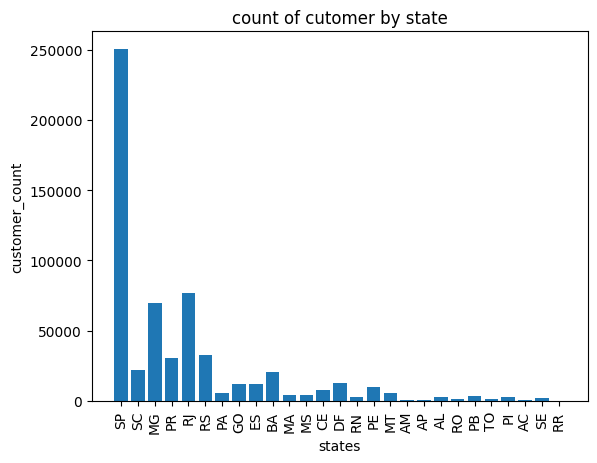

In [10]:
query= """ select customer_state,count(customer_id) from customers group by customer_state """
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["state","customer_count"])
df
plt.bar(df['state'],df['customer_count'])
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of cutomer by state")
plt.xticks(rotation=90)
plt.show()

# the number of orders per month in 2018.

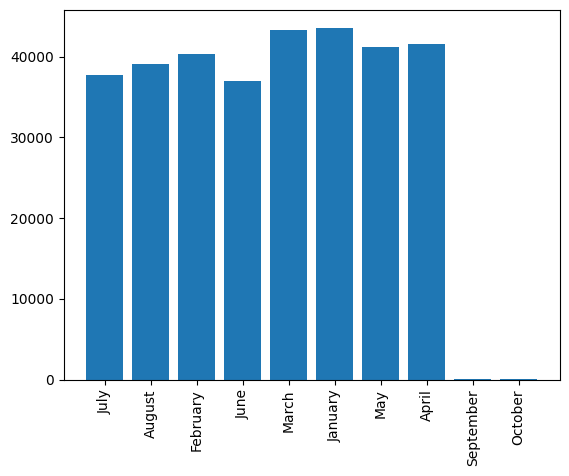

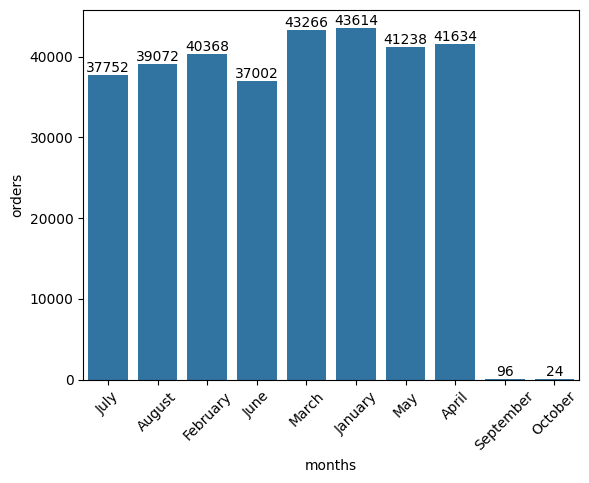

In [11]:
query= """ select monthname(order_purchase_timestamp) months,count(order_id) from orders where year(order_purchase_timestamp)=2018
 group by months"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["months","orders"])
df
#matplotlib
plt.bar(df["months"],df["orders"])
plt.xticks(rotation=90)
plt.show()
#seaborn
ax=sns.barplot(x=df['months'],y=df['orders'],data=df)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

# the average number of products per order, grouped by customer city.

In [12]:
query= """ with count_per_order as(select orders.order_id,orders.customer_id,count(order_items.order_id) as
oc from orders join order_items on orders.order_id=order_items.order_id group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) avg_order from customers join count_per_order 
on count_per_order.customer_id=customers.customer_id
group by customers.customer_city;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['city','avg_order'])
df.head(10)

,city,avg_order
0,sao jose dos campos,40.99
1,indaial,40.15
2,treze tilias,45.82
3,sao paulo,41.62
4,rio de janeiro,41.28
5,mario campos,48.00
6,guariba,36.00
7,cuiaba,43.11
8,franca,45.06
9,tocos,36.00


# the percentage of total revenue contributed by each product category.

In [13]:
query="""select upper(products.product_category) category,round(sum(payments.payment_value),2) sales 
from products join order_items on products.product_id=order_items.product_id join payments on
payments.order_id=order_items.order_id group by category"""
cur.execute(query)
data=cur.fetchall()
data

[('PERFUMERY', 109455550.54),
 ('FURNITURE DECORATION', 308918100.62),
 ('TELEPHONY', 105166522.95),
 ('FASHION BAGS AND ACCESSORIES', 47122188.48),
 ('BED TABLE BATH', 369911592.94),
 ('AUTOMOTIVE', 184095575.52),
 ('COMPUTER ACCESSORIES', 342431376.39),
 ('HOUSEWARES', 236467756.14),
 ('BABIES', 116606662.5),
 ('TOYS', 133712140.93),
 ('FURNITURE OFFICE', 139714521.22),
 ('COOL STUFF', 168414768.01),
 ('HEALTH BEAUTY', 357992593.79),
 ('PET SHOP', 67234097.59),
 ('GENERAL INTEREST BOOKS', 13974068.08),
 ('STATIONARY STORE', 68567055.05),
 ('WATCHES PRESENT', 308710802.58),
 ('PCS', 60290254.66),
 ('CLIMATIZATION', 19692862.45),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 52158736.14),
 ('SPORT LEISURE', 300699552.78),
 ('BAGS ACCESSORIES', 40424678.72),
 ('ELECTRONICS', 56129133.53),
 ('CASA CONSTRUCAO', 29515382.71),
 ('GAMES CONSOLES', 42223761.89),
 ('HOME APPLIANCES', 20634970.28),
 ('GARDEN TOOLS', 181068642.17),
 ('AGRO INDUSTRIA E COMERCIO', 25645811.88),
 (None, 54605169.38),
 ('AUD

# Identify the correlation between product price and the number of times a product has been purchased.

In [14]:
query= """ select products.product_category,count(order_items.order_id),round(avg(order_items.price)) from products join order_items on products.product_id=order_items.product_id
group by products.product_category;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["product_category","count_orders","price"])
df
arr1=df["count_orders"]
arr2=df["price"]
np.corrcoef([arr1,arr2])

array([[ 1.       , -0.1064395],
       [-0.1064395,  1.       ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

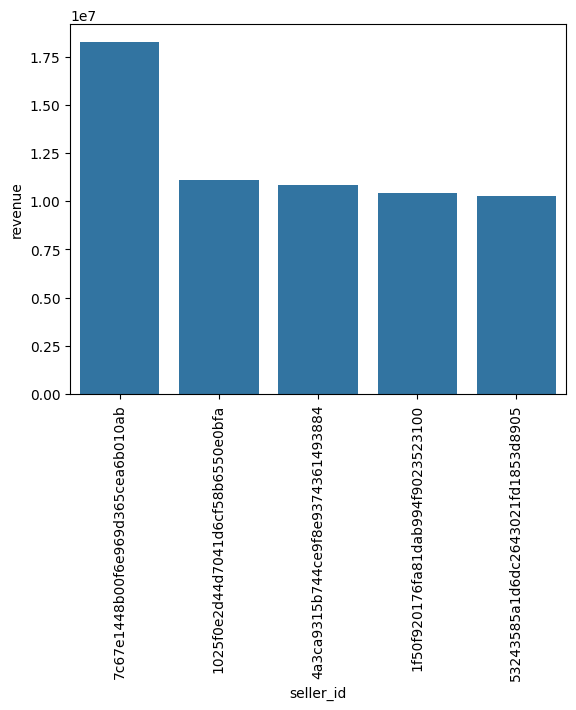

In [15]:
query= """ select *,dense_rank() over (order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value) revenue from order_items join payments on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head()
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

# the moving average of order values for each customer over their order history

In [16]:
query= """ select customer_id,order_purchase_timestamp,payment,avg(payment) over (partition by order_purchase_timestamp rows between 2 preceding and current row)
as moving_avg from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment from payments join orders
on orders.order_id=payments.order_id) as a;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['customer_id','purchase _time','payment','mov_avg'])
df

,customer_id,purchase _time,payment,mov_avg
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.229996
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.229996
2,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.229996
3,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.229996
4,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:19,136.23,136.229996
...,...,...,...,...
3739891,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,89.71,89.709999
3739892,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,89.71,89.709999
3739893,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,89.71,89.709999
3739894,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,89.71,89.709999


# cumulative sales per month for each year

In [17]:
query= """ select years,months,payment,sum(payment) over (order by years,months) cumulative_sum from
(select year(orders.order_purchase_timestamp) as years,month(orders.order_purchase_timestamp) as months,round(sum(payments.payment_value),2) as payment from orders join payments on 
orders.order_id=payments.order_id group by years,months order by years,months) as a;"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,9080.64,9.080640e+03
1,2016,10,2127257.28,2.136338e+06
2,2016,12,706.32,2.137044e+06
3,2017,1,4985569.44,7.122614e+06
4,2017,2,10508688.34,1.763130e+07
5,2017,3,16195089.58,3.382639e+07
6,2017,4,15040369.06,4.886676e+07
7,2017,5,21345077.52,7.021184e+07
8,2017,6,18405949.69,8.861779e+07
9,2017,7,21325785.10,1.099436e+08


# the year-over-year growth rate of total sales.

In [18]:
query= """  
with a as(select year(orders.order_purchase_timestamp) as years,round(sum(payments.payment_value),2) as payment from orders join payments on 
orders.order_id=payments.order_id group by years order by years) 

select years,((payment-lag(payment,1) over (order by years))/lag(payment,1) over (order by years)) * 100 from a
;"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','yoy % growth'])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703759
2,2018,20.000924


# retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [19]:
query= """  
with a as (select customers.customer_id,min(orders.order_purchase_timestamp) first_order from 
customers join orders on customers.customer_id=orders.customer_id group by customers.customer_id),
b as(select a.customer_id,count(distinct(orders.order_purchase_timestamp)) from a join orders on 
orders.customer_id=a.customer_id and orders.order_purchase_timestamp > first_order and 
orders.order_purchase_timestamp < date_add(first_order,interval 6 month) group by a.customer_id)
select 100*(count(distinct a.customer_id)/count(distinct b.customer_id)) from a left join b
on a.customer_id=b.customer_id;"""
cur.execute(query)
data=cur.fetchall()
data

[(None,)]

# top 3 customers who spent the most money in each year.

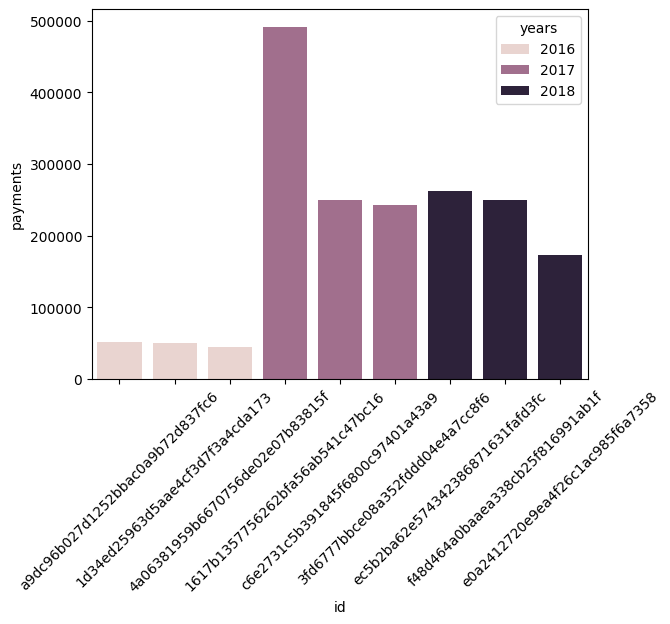

In [26]:
query= """  
select years,customer_id,payment,d_rank from
(select year(orders.order_purchase_timestamp) years,orders.customer_id,sum(payments.payment_value) payment,dense_rank()
over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank from orders join payments
on payments.order_id=orders.order_id group by year(orders.order_purchase_timestamp),orders.customer_id) as a
where d_rank <=3;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["years","id","payments","rank"])
df
sns.barplot(x="id",y="payments",data=df,hue="years")
plt.xticks(rotation=45)
plt.show()
